# To perform and analysis of Logistic Regression Algorithm

Importing the Libraries

In [3]:
import pandas as pd 
import numpy as np

# Data acquisitionuing Pandas 

In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\shiva'

In [6]:
os.chdir('C:\\Users\\shiva\\OneDrive\\Desktop\\datasets')

In [7]:
data=pd.read_csv("heart.csv")

In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [47]:
data.shape

(1025, 14)

In [48]:
data.size

14350

In [49]:
data.ndim

2

In [50]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Data preprocessing _ data cleaning _ missing value treatment

In [51]:
# check Missing Value by record 

data.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [52]:
data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [53]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Independent and Dependent Variables


In [54]:
x=data.drop("target", axis=1)
y=data["target"]

# Splitting of DataSet into train and Test¶

In [55]:
#splitting the data into training and testing data sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=42)

In [56]:
import warnings
warnings.filterwarnings('ignore')


# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [59]:
y_pred1 = log.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score 

In [61]:
accuracy_score (y_test,y_pred1)


0.7853658536585366

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [63]:
cm = confusion_matrix(y_test, y_pred1)

In [64]:
labels = np.unique(y_test)  # Get unique class labels
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

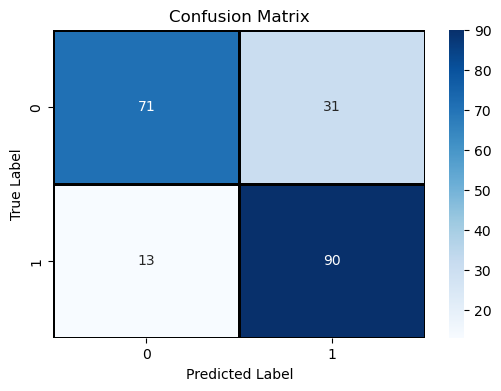

In [65]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# KNN Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 


In [67]:
knn=KNeighborsClassifier()

In [68]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [69]:
y_pred2=knn.predict(x_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred2)

In [71]:
accuracy

0.7317073170731707

# Support Vector Classifier / Machine (SVC/SVM)

In [72]:
from sklearn import svm
svm=svm.SVC()
svm.fit(x_train, y_train)

SVC()

In [73]:
y_pred3=svm.predict(x_test)

In [74]:
accuracy_score (y_test,y_pred3)

0.6829268292682927

# Decision Trees Algorithm

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt=DecisionTreeClassifier()

In [77]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [78]:
y_pred4=dt.predict(x_test)

In [79]:
accuracy_score (y_test,y_pred4)

0.9853658536585366

# Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf=RandomForestClassifier()

In [82]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [83]:
y_pred5=rf.predict(x_test)

In [84]:
accuracy_score (y_test,y_pred5)

0.9853658536585366

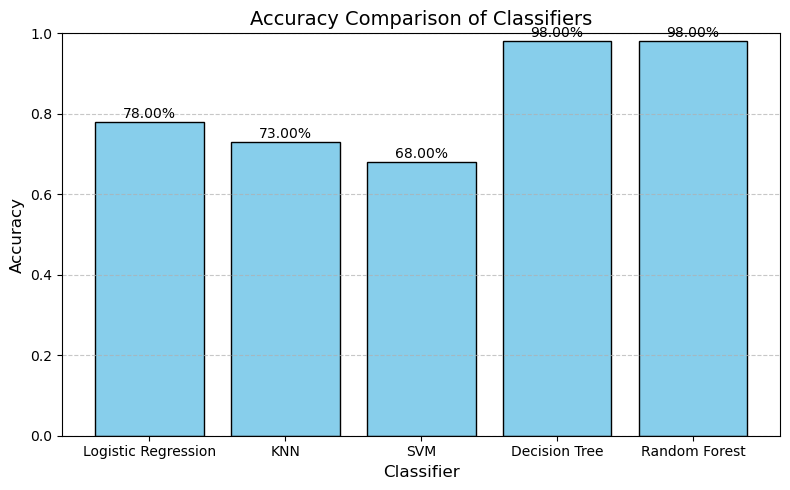

In [85]:
import matplotlib.pyplot as plt

# Example accuracy values 
accuracies = {
    'Logistic Regression': 0.78,
    'KNN': 0.73,
    'SVM': 0.68,
    'Decision Tree': 0.98,
    'Random Forest': 0.98
}

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue', edgecolor='black')

# Add chart details
plt.title('Accuracy Comparison of Classifiers', fontsize=14)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show accuracy values on bars
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.01, f"{acc*100:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


Bagging

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Example dataset (replace with your own X, y)
X, y = load_iris(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base model
base_model = DecisionTreeClassifier(random_state=42)

# ✅ Use 'estimator' instead of 'base_estimator'
bag_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=50,
    random_state=42
)

# Train
bag_model.fit(X_train, y_train)

# Predict
y_pred_bag = bag_model.predict(X_test)

# Evaluate
bag_accuracy = accuracy_score(y_test, y_pred_bag)
print(f"Bagging Classifier Accuracy: {bag_accuracy:.4f}")


Bagging Classifier Accuracy: 1.0000


Boosting

In [87]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create AdaBoost model (use 'estimator' instead of 'base_estimator')
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Train
ada_model.fit(X_train, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test)

# Evaluate
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Classifier Accuracy: {ada_accuracy:.4f}")


AdaBoost Classifier Accuracy: 0.9333


In [88]:
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")


Gradient Boosting Accuracy: 1.0000


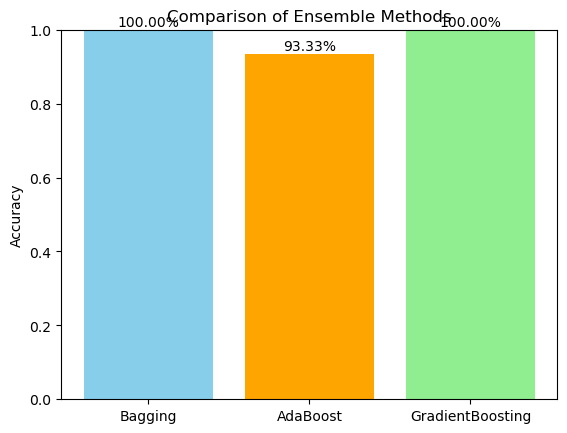

In [89]:
import matplotlib.pyplot as plt

accuracies = {
    'Bagging': bag_accuracy,
    'AdaBoost': ada_accuracy,
    'GradientBoosting': gb_accuracy
}

plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'orange', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Comparison of Ensemble Methods')
plt.ylim(0, 1)

for i, (k, v) in enumerate(accuracies.items()):
    plt.text(i, v + 0.01, f"{v*100:.2f}%", ha='center')

plt.show()
